# Working with GeoDataFrames

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [2]:
boros = read_file('/nybb_15b/nybb.shp', vfs='zip://nybb_15b.zip')
boros

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...


In [3]:
boros.set_index('BoroCode', inplace=True)
boros.sort(inplace=True)
boros

,BoroName,Shape_Area,Shape_Leng,geometry
BoroCode,,,,
1,Manhattan,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...


In [4]:
boros.reset_index(inplace=True)
boros.set_index('BoroName', inplace=True)

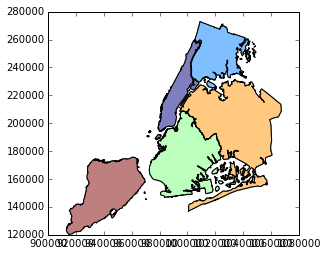

In [5]:
boros.plot()

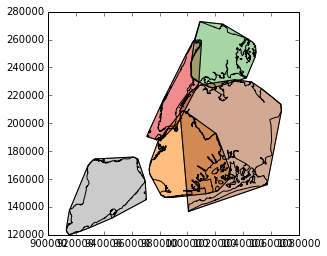

In [6]:
boros.plot(alpha=0.0)
boros.geometry.convex_hull.plot()

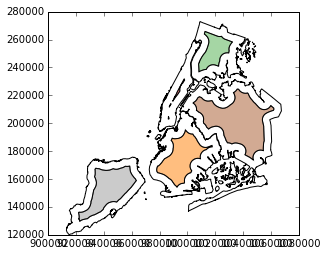

In [7]:
eroded = boros.geometry.buffer(-5280)
boros.plot(alpha=0.0)
eroded.plot()

In [8]:
eroded.area

BoroName
Manhattan        1.128785e+07
Bronx            3.371876e+08
Brooklyn         6.711072e+08
Queens           1.301421e+09
Staten Island    7.263977e+08
dtype: float64

In [9]:
boros.geometry.area

BoroName
Manhattan        6.364464e+08
Bronx            1.186974e+09
Brooklyn         1.937596e+09
Queens           3.045168e+09
Staten Island    1.623829e+09
dtype: float64

In [10]:
inland = 100.0 * eroded.area / boros.geometry.area

In [11]:
boros['inland_fraction'] = inland

In [12]:
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction
BoroName,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620


Let's create a normal pandas `Series` with population values for each borough from the 2010 census.

In [13]:
population = Series({'Manhattan': 1585873, 'Bronx': 1385108, 'Brooklyn': 2504700,
                     'Queens': 2230722, 'Staten Island': 468730})
population

Bronx            1385108
Brooklyn         2504700
Manhattan        1585873
Queens           2230722
Staten Island     468730
dtype: int64

In [14]:
boros['population'] = population
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population
BoroName,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,1585873
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,1385108
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,2504700
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,2230722
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,468730


In [15]:
boros['pop_density'] = boros['population'] / boros.geometry.area * 5280 ** 2

In [16]:
boros.sort(columns='pop_density', ascending=False)

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population,pop_density
BoroName,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,1585873,69466.335981
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,2504700,36037.963313
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,1385108,32531.958243
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,2230722,20422.174910
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,468730,8047.300267


In [17]:
boros['simplified'] = boros.geometry.simplify(1000)
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population,pop_density,simplified
BoroName,,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,1585873,69466.335981,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,1385108,32531.958243,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,2504700,36037.963313,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,2230722,20422.174910,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,468730,8047.300267,(POLYGON ((970217.0223999023 145643.3322143555...


In [18]:
boros.set_geometry('simplified', inplace=True)
boros

,BoroCode,Shape_Area,Shape_Leng,geometry,inland_fraction,population,pop_density,simplified
BoroName,,,,,,,,
Manhattan,1,6.364467e+08,358408.460709,(POLYGON ((981219.0557861328 188655.3157958984...,1.773574,1585873,69466.335981,(POLYGON ((981219.0557861328 188655.3157958984...
Bronx,2,1.186973e+09,464400.198868,(POLYGON ((1012821.805786133 229228.2645874023...,28.407326,1385108,32531.958243,(POLYGON ((1012821.805786133 229228.2645874023...
Brooklyn,3,1.937597e+09,741185.900596,(POLYGON ((1021176.479003906 151374.7969970703...,34.636066,2504700,36037.963313,(POLYGON ((1021176.479003906 151374.7969970703...
Queens,4,3.045168e+09,897040.298576,(POLYGON ((1029606.076599121 156073.8142089844...,42.737251,2230722,20422.174910,(POLYGON ((1029606.076599121 156073.8142089844...
Staten Island,5,1.623827e+09,330466.075042,(POLYGON ((970217.0223999023 145643.3322143555...,44.733620,468730,8047.300267,(POLYGON ((970217.0223999023 145643.3322143555...


In [19]:
boros._geometry_column_name

'simplified'

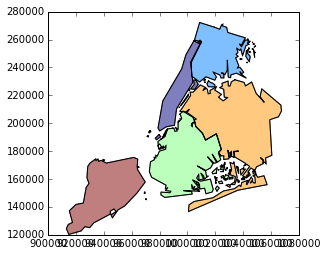

In [20]:
boros.plot()